<a href="https://colab.research.google.com/github/ashok-arora/ML-Zoomcamp/blob/main/homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 6.10 Homework

The goal of this homework is to create a tree-based regression model for prediction apartment prices (column `'price'`).

In this homework we'll again use the New York City Airbnb Open Data dataset - the same one we used in homework 2 and 3.

You can take it from [Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)
or download from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv)
if you don't want to sign up to Kaggle.

Let's load the data:

In [50]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv

--2021-10-19 21:58:36--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘AB_NYC_2019.csv.1’

AB_NYC_2019.csv.1   100%[===================>]   6.75M  --.-KB/s    in 0.1s    

2021-10-19 21:58:36 (70.2 MB/s) - ‘AB_NYC_2019.csv.1’ saved [7077973/7077973]



In [79]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import xgboost as xgb

%matplotlib inline

In [52]:
columns = [
    'neighbourhood_group', 'room_type', 'latitude', 'longitude',
    'minimum_nights', 'number_of_reviews','reviews_per_month',
    'calculated_host_listings_count', 'availability_365',
    'price'
]

df = pd.read_csv('AB_NYC_2019.csv', usecols=columns)
df.reviews_per_month = df.reviews_per_month.fillna(0)

* Apply the log tranform to `price`
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1

In [53]:
df.isnull().sum()

neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [54]:
df['price'] = np.log1p(df['price'])
df['price'].describe()

count    48895.000000
mean         4.736885
std          0.695344
min          0.000000
25%          4.248495
50%          4.672829
75%          5.170484
max          9.210440
Name: price, dtype: float64

In [55]:
# split df into full train and test, 80-20
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

# split full_train into train and val, 80-20
# 20% of full_train ==> 20/80 = 1/4 = 25%
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

print(len(df), len(df_train), len(df_val), len(df_test))

48895 29337 9779 9779


In [56]:
# seperate target variable
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

# delete target variable from df
del df_train['price']
del df_val['price']
del df_test['price']

Now, use `DictVectorizer` to turn train and validation into matrices:

In [57]:
# for feature encoding, convert df to dict
dict_train = df_train.to_dict(orient='records')
dict_val = df_val.to_dict(orient='records')

dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

## Question 1

Let's train a decision tree regressor to predict the price variable. 

* Train a model with `max_depth=1`

In [58]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Which feature is used for splitting the data?

* `room_type`
* `neighbourhood_group`
* `number_of_reviews`
* `reviews_per_month`

In [59]:
print(export_text(dt))

|--- feature_12 <= 0.50
|   |--- value: [4.29]
|--- feature_12 >  0.50
|   |--- value: [5.15]



In [60]:
print(export_text(dt, dv.get_feature_names()))

|--- room_type=Entire home/apt <= 0.50
|   |--- value: [4.29]
|--- room_type=Entire home/apt >  0.50
|   |--- value: [5.15]



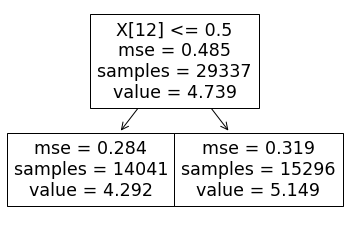

In [61]:
plot_tree(dt)
plt.show()

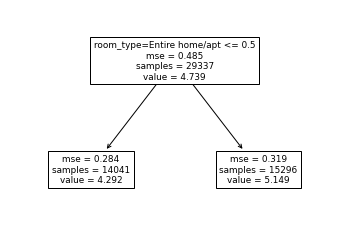

In [62]:
plot_tree(dt, feature_names=dv.get_feature_names())
plt.show()

Hence, **room_type** was used for splitting the data.

## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1`  (optional - to make training faster)

In [63]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

In [64]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

What's the RMSE of this model on validation?

* 0.059
* 0.259
* 0.459
* 0.659

In [74]:
y_pred = rf.predict(X_val)

In [75]:
rmse = mean_squared_error( y_val, rf.predict(X_val), squared=False)
rmse

0.460888788095762

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10
* Set `random_state` to `1`
* Evaluate the model on the validation dataset

In [77]:
rmses = []
for x in range(10, 200, 10):
  rf = RandomForestRegressor(n_estimators=x, random_state=1, n_jobs=-1)
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_val)
  rmse = mean_squared_error(y_val, rf.predict(X_val), squared=False)
  rmses.append((x, rmse))

In [78]:
rmses

[(10, 0.460888788095762),
 (20, 0.4474405542590174),
 (30, 0.44440015830200136),
 (40, 0.44281711871165336),
 (50, 0.44176815762157207),
 (60, 0.44125165338475053),
 (70, 0.44064455072014125),
 (80, 0.440740830263047),
 (90, 0.4402749020311618),
 (100, 0.4397631903425602),
 (110, 0.4393128261208466),
 (120, 0.43912990819267467),
 (130, 0.4392796575512702),
 (140, 0.4391514983746916),
 (150, 0.43902892484355854),
 (160, 0.4388423640549406),
 (170, 0.4387460509023033),
 (180, 0.4388528948224223),
 (190, 0.43879074353852315)]

After which value of `n_estimators` does RMSE stop improving?

- 10
- 50
- 70
- 120

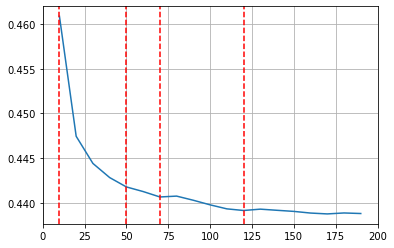

In [93]:
plt.plot(*zip(*rmses))
plt.xlim(0, 200)
plt.grid()
plt.axvline(10, color='r', linestyle='--')
plt.axvline(50, color='r', linestyle='--')
plt.axvline(70, color='r', linestyle='--')
plt.axvline(120, color='r', linestyle='--')

In [101]:
a = rmses[1-1][1] - rmses[5-1][1]
b = rmses[5-1][1] - rmses[7-1][1]
c = rmses[7-1][1] - rmses[12-1][1]
d = rmses[12-1][1] - rmses[19-1][1]
print(a, b, c, d, 'Minimum decline: %f' % min(a, b, c, d), sep='\n')

0.019120630474189937
0.001123606901430818
0.001514642527466581
0.00033916465415151364
Minimum decline: 0.000339


RMSE stops improving after **120 estimators**. 

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
* Fix the random seed: `random_state=1`

In [111]:
different_depths = {}
for d in range(10, 26, 5):
  rmses = []
  for x in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=x, max_depth=d, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse = mean_squared_error(y_val, rf.predict(X_val), squared=False)
    rmses.append((x, rmse))
  different_depths[d] = rmses

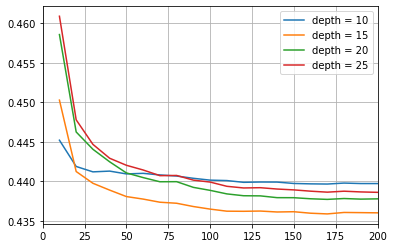

In [144]:
for depth, rmses in different_depths.items():
  plt.plot(*zip(*rmses), label='depth = %d' % depth)
  plt.xlim(0, 200)
plt.grid()
plt.legend()
plt.show()

What's the best `max_depth`:

* 10
* 15
* 20
* 25

Bonus question (not graded):

Will the answer be different if we change the seed for the model?

From the graph, best max_depth = **15**.

## Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorith, it finds the best split. 
When doint it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the imporatant features 
for tree-based models.

In Scikit-Learn, tree-based models contain this information in the `feature_importances_` field. 

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
    * `n_estimators=10`,
    * `max_depth=20`,
    * `random_state=1`,
    * `n_jobs=-1` (optional)
* Get the feature importance information from this model

In [114]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20,
                           random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [116]:
list(zip(dv.get_feature_names(), dt.feature_importances_))

[('availability_365', 0.0),
 ('calculated_host_listings_count', 0.0),
 ('latitude', 0.0),
 ('longitude', 0.0),
 ('minimum_nights', 0.0),
 ('neighbourhood_group=Bronx', 0.0),
 ('neighbourhood_group=Brooklyn', 0.0),
 ('neighbourhood_group=Manhattan', 0.0),
 ('neighbourhood_group=Queens', 0.0),
 ('neighbourhood_group=Staten Island', 0.0),
 ('number_of_reviews', 0.0),
 ('reviews_per_month', 0.0),
 ('room_type=Entire home/apt', 1.0),
 ('room_type=Private room', 0.0),
 ('room_type=Shared room', 0.0)]

What's the most important feature? 

* `neighbourhood_group=Manhattan`
* `room_type=Entire home/apt`	
* `longitude`
* `latitude`

In [117]:
importances = list(zip(dv.get_feature_names(), dt.feature_importances_))

df_importance = pd.DataFrame(importances, columns=['feature', 'gain'])
df_importance = df_importance.sort_values(by='gain', ascending=False)
df_importance

,feature,gain
12,room_type=Entire home/apt,1.0
0,availability_365,0.0
1,calculated_host_listings_count,0.0
2,latitude,0.0
3,longitude,0.0
4,minimum_nights,0.0
5,neighbourhood_group=Bronx,0.0
6,neighbourhood_group=Brooklyn,0.0
7,neighbourhood_group=Manhattan,0.0
8,neighbourhood_group=Queens,0.0


## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

In [125]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.get_feature_names())
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.get_feature_names())

In [126]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [127]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

In [128]:
%%capture output
# capture instruction that saves the result to output 
model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

In [137]:
def parse_xgb_output(output):
    tree = []
    p_train = []
    p_val = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        tree.append(it)
        p_train.append(train)
        p_val.append(val)

    return tree, p_train, p_val
#enddef
tree, p_train, p_val = parse_xgb_output(output)


In [138]:
print('Best performance ', min(zip(p_val, tree)))

Best performance  (0.432784, 70)


Now change `eta` first to `0.1` and then to `0.01`

In [131]:
%%capture output_010
# capture instruction that saves the result to output 
xgb_params['eta'] = 0.1
model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

In [132]:
tree, _, p_val = parse_xgb_output(output_010)
print(f'Eta={xgb_params["eta"]} : Best performance ', min(zip(p_val, tree)))

Eta=0.1 : Best performance  (0.432873, 99)


In [133]:
%%capture output_001
# capture instruction that saves the result to output 
xgb_params['eta'] = 0.01
model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

In [140]:
tree, _, p_val = parse_xgb_output(output_001)
print(f'Eta={xgb_params["eta"]} : Best performance ', min(zip(p_val, tree)))

Eta=0.01 : Best performance  (1.63049, 99)


Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* 0.01

best RMSE for eta=**0.3**.

## Submit the results


Submit your results here: https://forms.gle/wQgFkYE6CtdDed4w8

It's possible that your answers won't match exactly. If it's the case, select the closest one.


## Deadline


The deadline for submitting is 20 October 2021, 17:00 CET (Wednesday). After that, the form will be closed.

